In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [5]:
sloan_data_path = 'C:\\Users\\Phillip\\Desktop\\ml\\Skyserver_SQL2_27_2018 6_51_39 PM.csv'
planet_data = pd.read_csv(sloan_data_path)

In [202]:
planet_data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,label,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [97]:
# class is a keyword, so I changed the name of that column in the data frame
planet_data.rename(columns={'class':'label'}, inplace=True)
Y = planet_data.label
X = planet_data.drop(columns='label')

In [98]:
X.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512


In [115]:
print(Y)

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: label, Length: 10000, dtype: object


In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
print(Y_pred)
print(X_test.redshift)

0.988
['STAR' 'QSO' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']
572    -0.000341
4706    0.797075
2890    0.071341
7881    0.114682
4442    0.000037
          ...   
835     0.000688
1494    0.000531
4249    0.039342
1565    0.064496
979     0.111736
Name: redshift, Length: 2000, dtype: float64


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

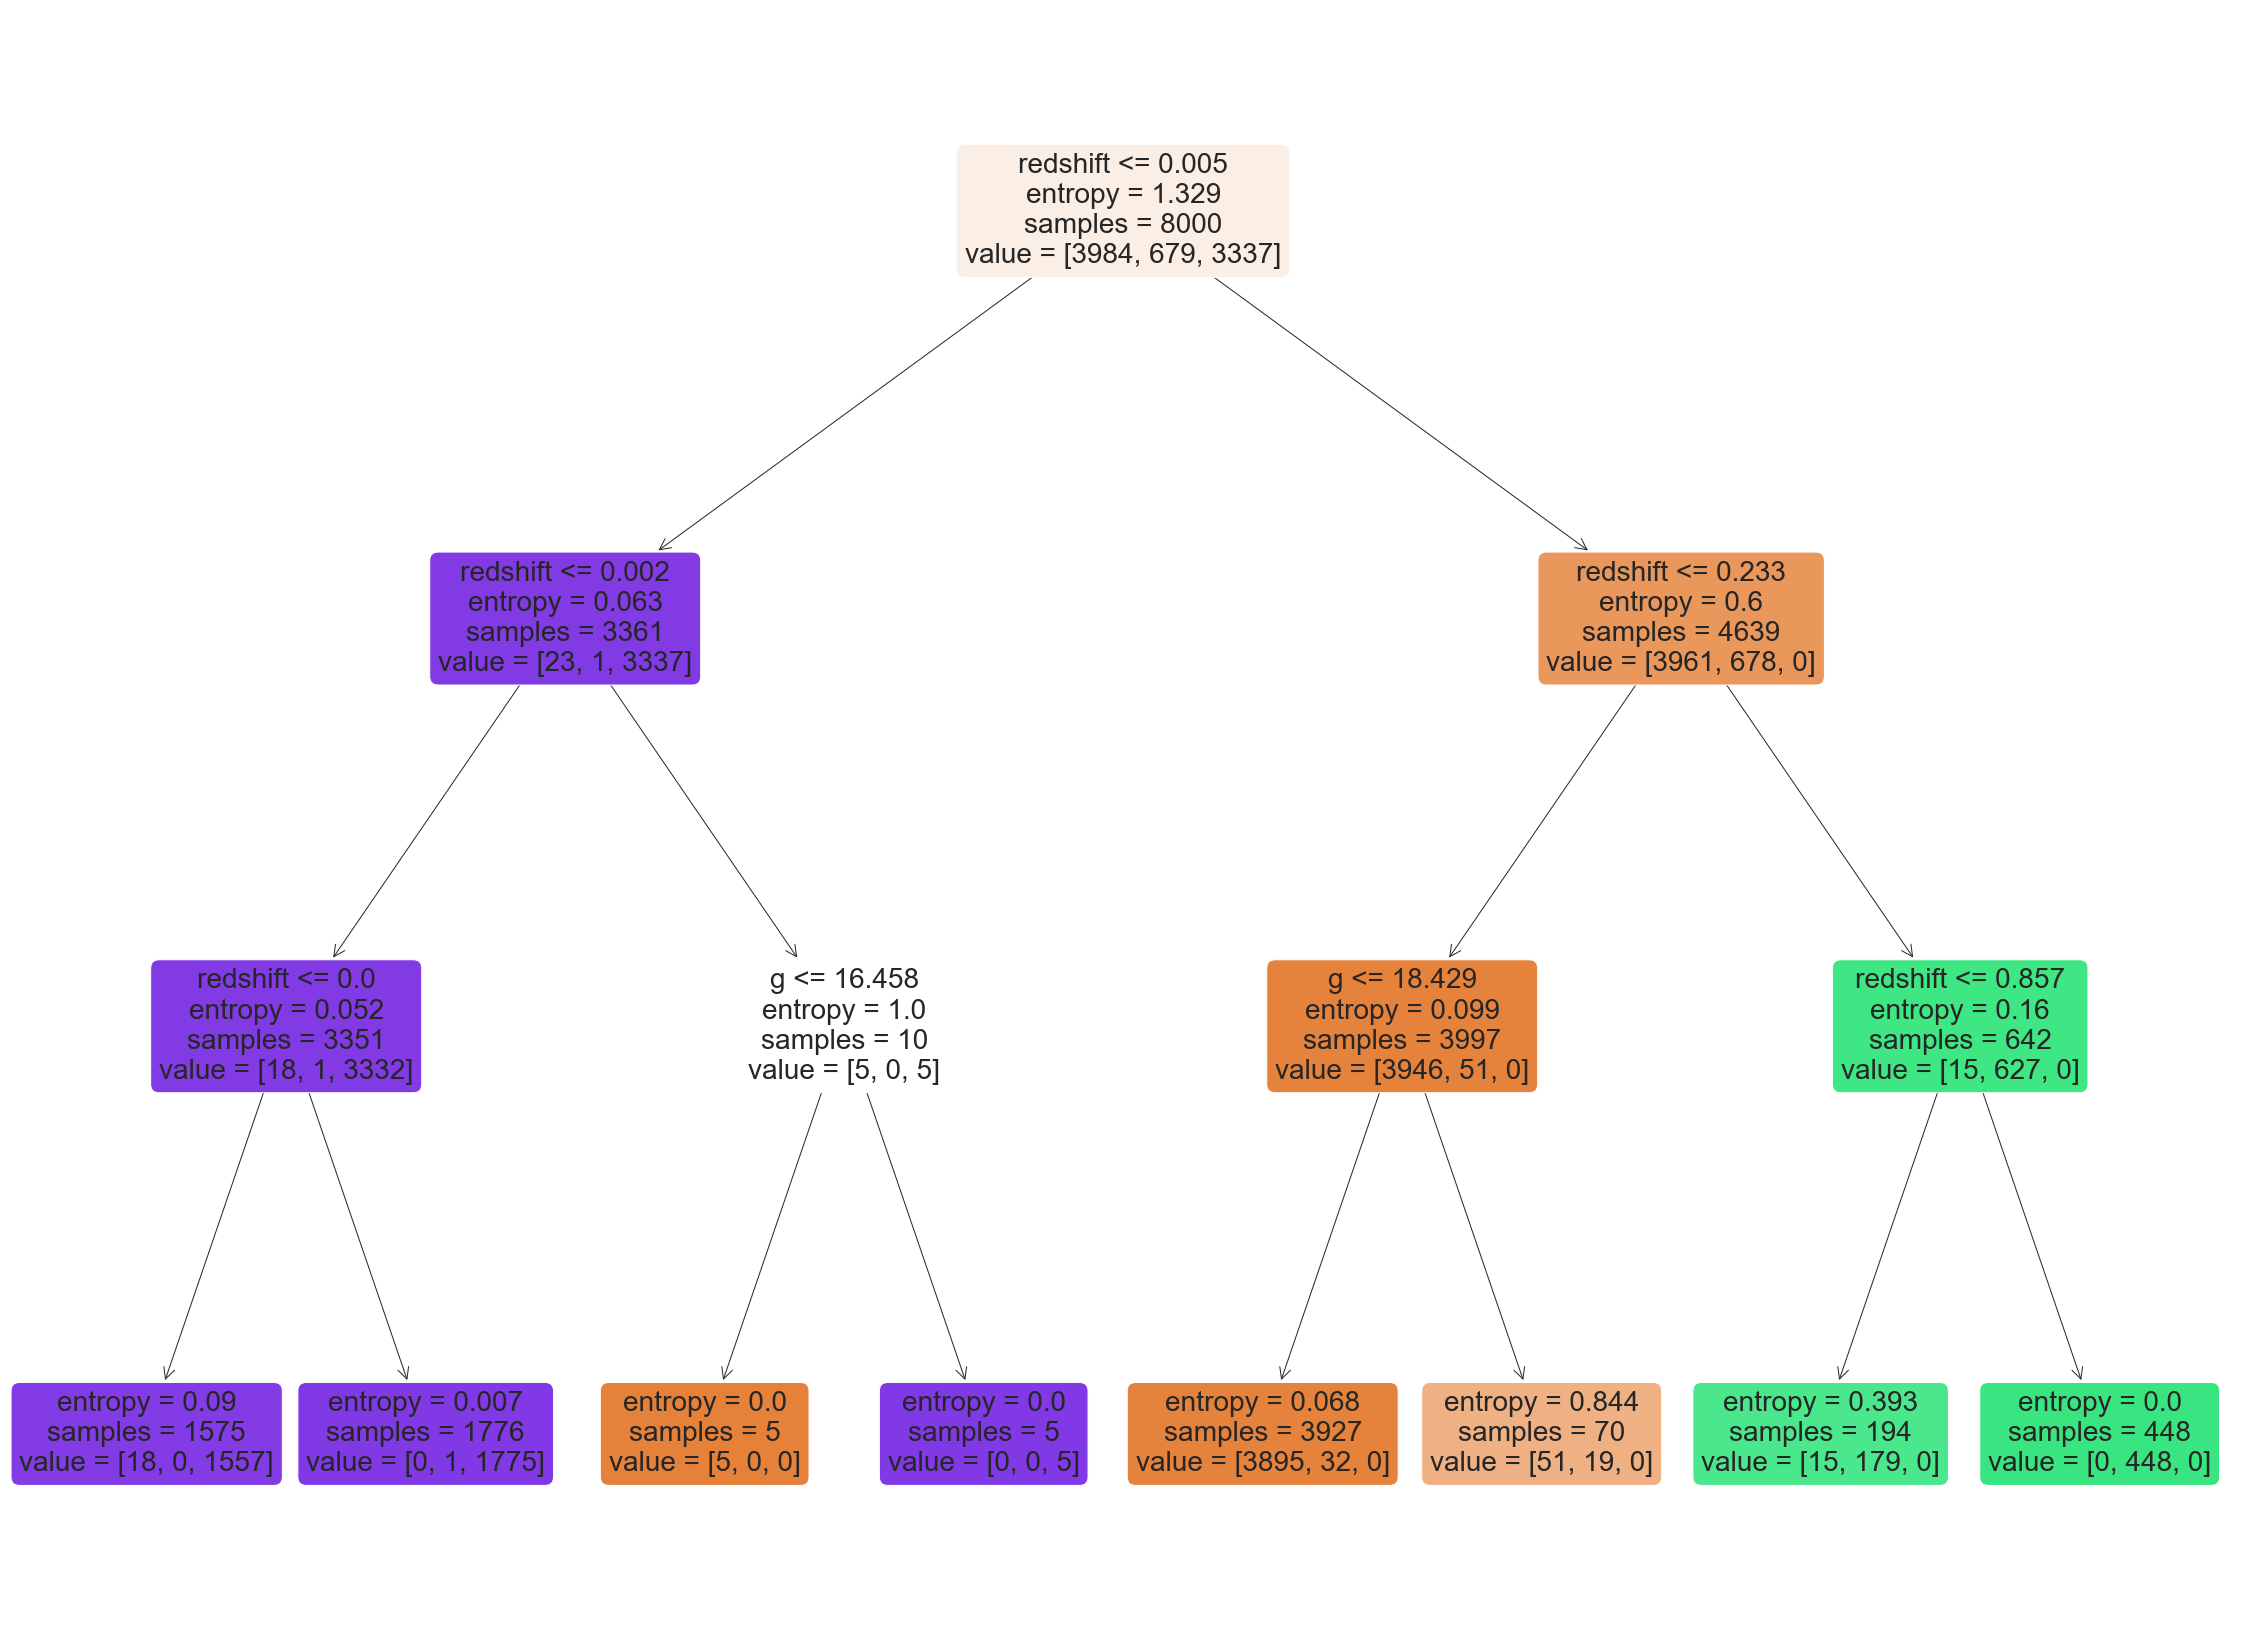

In [207]:
plt.figure(figsize=(40,30))

tree.plot_tree(clf, fontsize= 28, feature_names = X.columns, filled = True, rounded = True);

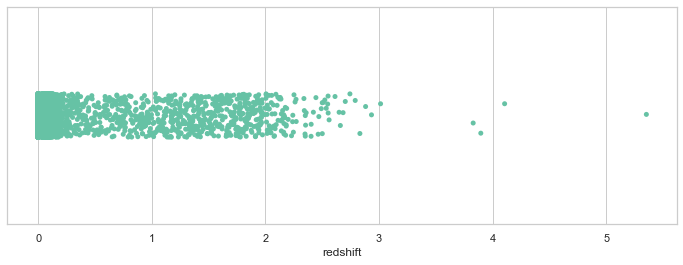

In [251]:
import seaborn as sns
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,4))
sc_plot = sns.stripplot(x= planet_data.redshift, palette="Set2")
# this graph is not helpful on it's own and I'm not intending it to be seen as a legit visualization
# I kept this in to document my thought process that led me to using a box plot

<AxesSubplot:xlabel='redshift', ylabel='label'>

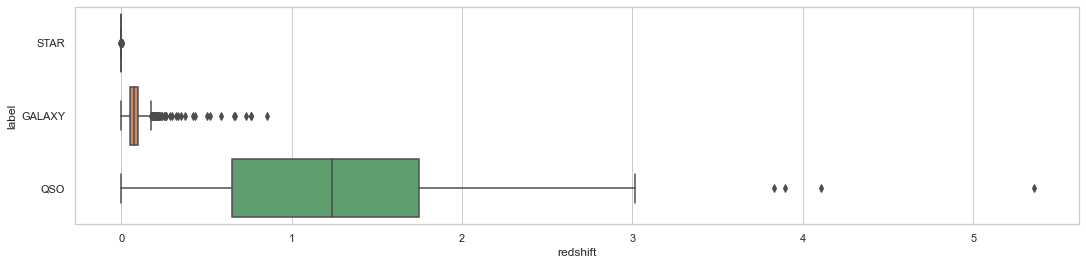

In [256]:
plt.figure(figsize=(18,4))
sns.boxplot(x= 'redshift', y= 'label', data= planet_data)